In [2]:
from methods import generateDataFrame, gen_stats, generateDataFrame_memory
from mido import MidiFile, tick2second
import sys
import glob
import os
from math import isinf
from numpy import array, zeros, full, argmin, inf, ndim
import numpy as np
from natsort import natsorted
import pandas as pd
from scipy  import stats
import math

In [3]:
# Set the figure size - handy for larger output
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams.update({'font.size': 15})

In the following noteboot we work with two ids: 
- the IDs given to the users in the study: participantsIDs
- the IDs given to the users for the purposes of the paper: paperIDs

The following dictionary translates between the two IDs

In [4]:
participantsIDs = [2,6,7,8,9,11,14,15,16,17,20,4,5,10,12,18,19,21,22,23,24]
paperIDs = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21"]

translator = {}
for participantID, paperID in zip(participantsIDs, paperIDs):
    translator[participantID] = paperID
    
def translateToPaper(participantIDsList):
    paperIDsList = []
    for partID in participantIDsList:
        paperIDsList.append(translator[partID])
    return paperIDsList

# Game

The following cell calculated the percentile difference in clicks between one game session score and the previous game session score. We are interested in the users whos second game was over 20% worse at the second game in comparison to the previous one.

In [5]:
import re

def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

def cal_game_score(number):
    i = 1
    clicks = []
    scores = []
    for name in natsorted(glob.glob(f'retentionData/{number}/gweled/*.txt')):
        score = 0
        file = open(name, 'r') 
        j = 0
        for line in file:
            s = line.strip()
            temp = re.findall(r'\d+', s)
            if (len(temp) > 0):
                score = score + int(temp[-1])
                j = j+1
        clicks.append(j)
        scores.append(score)
        i = i + 1
        # Closing files 
        file.close()
    return clicks, scores

for number in participantsIDs:
    clicks, scores = cal_game_score(number)
    i = 0
    while i < len(clicks) - 1:
        if clicks[i] > clicks [i+1]:
            if (abs(clicks[i]-clicks[i+1])*100)/clicks[i] > 20:
                print(f"{number} with id {translator[number]} is an outlier")
                print(f"{number} with clicks {clicks[i]} vs {clicks[i+1]}")
                print(f"{number} with score {scores[i]} vs {scores[i+1]}")
        i = i + 1

6 with id 2 is an outlier
6 with clicks 471 vs 338
6 with score 1450 vs 1039


In [6]:
### ALL
#from table in paper except participant 6 who was excluded because he was an outlier
allP = [2,7,8,9,11,14,15,16,17,20,4,5,10,12,18,19,21,22,23,24]
df_allP = generateDataFrame(allP)
df_allP.index = translateToPaper(allP)

### Noplay
noplay = [4,5,10,12,18,19,21,22,23,24]
df_noplay = generateDataFrame(noplay)
df_noplay.index = translateToPaper(noplay)

### Play
play = [2,8,7,9,11,14,15,16,17,20]
df_play = generateDataFrame(play)
df_play.index = translateToPaper(play)

# Time

In [7]:
gen_stats(df_allP, 'active time', 'passive time')

--------MEAN ALL------------
mean of active time: 3.8
mean of passive time : 42.0
------------------------
--------std ALL------------
standard diviation of active time: 2.891
standard diviation of passive time: 20.881
------------------------
--------SE ALL------------
standard error of active time : 0.647
standard error of passive time: 4.669
------------------------
--------Normal distribution ALL------------
Gaussian: active time: [0.809 0.001]
Gaussian: passive time: [0.838 0.003]
------------------------


# Performance achieved

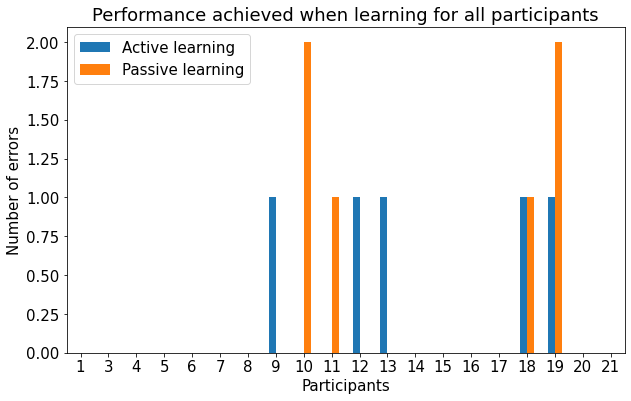

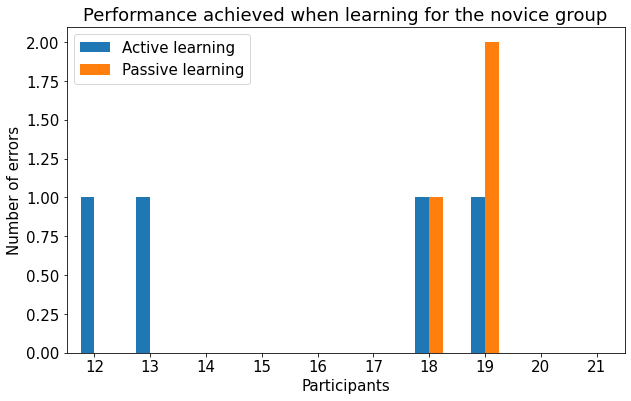

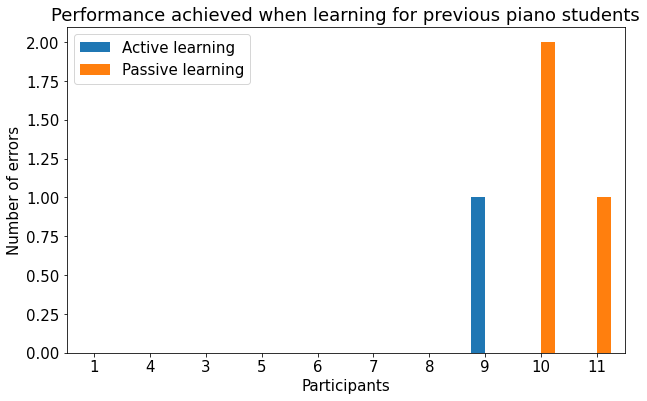

In [8]:
# ALL
df_holder = df_allP.copy()
df_holder.rename(columns = {'active learn':'Active learning'}, inplace = True)
df_holder.rename(columns = {'passive learn':'Passive learning'}, inplace = True)
df_holder[["Active learning", "Passive learning"]].plot.bar()
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Performance achieved when learning for all participants")
plt.xlabel("Participants")
plt.ylabel("Number of errors")
plt.savefig("performance_learning_all.png")

# No Play
df_holder = df_noplay.copy()
df_holder.rename(columns = {'active learn':'Active learning'}, inplace = True)
df_holder.rename(columns = {'passive learn':'Passive learning'}, inplace = True)
df_holder[["Active learning", "Passive learning"]].plot.bar()
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Performance achieved when learning for the novice group")
plt.xlabel("Participants")
plt.ylabel("Number of errors")
plt.savefig("performance_learning_noplay.png")

# Play
df_holder = df_play.copy()
df_holder.rename(columns = {'active learn':'Active learning'}, inplace = True)
df_holder.rename(columns = {'passive learn':'Passive learning'}, inplace = True)
df_holder[["Active learning", "Passive learning"]].plot.bar()
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Performance achieved when learning for previous piano students")
plt.xlabel("Participants")
plt.ylabel("Number of errors")
plt.savefig("performance_learning_play.png")

# Attempts

## Attempts for all participants

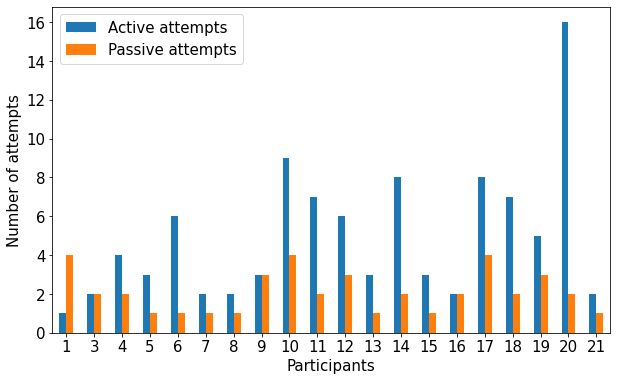

In [9]:
df_holder = df_allP.copy()
df_holder.rename(columns = {'activeAttempts':'Active attempts'}, inplace = True)
df_holder.rename(columns = {'passiveAttempts':'Passive attempts'}, inplace = True)
df_holder[["Active attempts","Passive attempts"]].plot.bar()
plt.xticks(rotation=0, horizontalalignment="center")
# plt.title("Number of Attempts to Learn")
plt.xlabel("Participants")
plt.ylabel("Number of attempts")
plt.savefig("attempts_all.png")

In [10]:
print("ALL--------------------------------------------------")
gen_stats(df_allP, "activeAttempts","passiveAttempts")
print(stats.wilcoxon(df_allP['activeAttempts'], 
                     df_allP['passiveAttempts'], 
                     zero_method='wilcox', 
                     correction=False, 
                     alternative='two-sided', 
                     mode='auto'))

ALL--------------------------------------------------
--------MEAN ALL------------
mean of activeAttempts: 4.95
mean of passiveAttempts : 2.1
------------------------
--------std ALL------------
standard diviation of activeAttempts: 3.485
standard diviation of passiveAttempts: 1.044
------------------------
--------SE ALL------------
standard error of activeAttempts : 0.779
standard error of passiveAttempts: 0.233
------------------------
--------Normal distribution ALL------------
Gaussian: activeAttempts: [0.838 0.003]
Gaussian: passiveAttempts: [0.838 0.003]
------------------------
WilcoxonResult(statistic=9.5, pvalue=0.0014359992276092018)


/home/theone/.local/environ/retention/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


## Attempts for novices

In [11]:
gen_stats(df_noplay, "activeAttempts","passiveAttempts")
print(stats.wilcoxon(df_noplay['activeAttempts'], 
                     df_noplay['passiveAttempts'], 
                     zero_method='wilcox', 
                     correction=False, 
                     alternative='two-sided', 
                     mode='auto'))

--------MEAN ALL------------
mean of activeAttempts: 6.0
mean of passiveAttempts : 2.1
------------------------
--------std ALL------------
standard diviation of activeAttempts: 4.0
standard diviation of passiveAttempts: 0.943
------------------------
--------SE ALL------------
standard error of activeAttempts : 1.265
standard error of passiveAttempts: 0.298
------------------------
--------Normal distribution ALL------------
Gaussian: activeAttempts: [0.842 0.047]
Gaussian: passiveAttempts: [0.886 0.152]
------------------------
WilcoxonResult(statistic=0.0, pvalue=0.007473541540877042)


/home/theone/.local/environ/retention/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


## Attempts for previous piano students

In [12]:
gen_stats(df_play, "activeAttempts","passiveAttempts")
print(stats.wilcoxon(df_play['activeAttempts'], 
                     df_play['passiveAttempts'], 
                     zero_method='wilcox', 
                     correction=False, 
                     alternative='two-sided', 
                     mode='auto'))

--------MEAN ALL------------
mean of activeAttempts: 3.9
mean of passiveAttempts : 2.1
------------------------
--------std ALL------------
standard diviation of activeAttempts: 2.468
standard diviation of passiveAttempts: 1.136
------------------------
--------SE ALL------------
standard error of activeAttempts : 0.78
standard error of passiveAttempts: 0.359
------------------------
--------Normal distribution ALL------------
Gaussian: activeAttempts: [0.884 0.145]
Gaussian: passiveAttempts: [0.824 0.028]
------------------------
WilcoxonResult(statistic=5.0, pvalue=0.06666904726002462)


## Attempts for participants whose accuracy was the same for both conditions

In [13]:
zeroP = [2,7,8,9,11,14,15,10,12,18,21,19,23,24]
df_zeroP = generateDataFrame(zeroP)
df_zeroP.index = translateToPaper(zeroP)

### Noplay
noplay_zero = [10,12,18,21,19,23,24]
df_noplay_zero = generateDataFrame(noplay_zero)
df_noplay_zero.index = translateToPaper(noplay_zero)

### Play
play_zero = [2,8,7,9,11,14,15]
df_play_zero = generateDataFrame(play_zero)
df_play_zero.index = translateToPaper(play_zero)

Check if both conditions accuracy was the same

Text(0, 0.5, 'Number of errors')

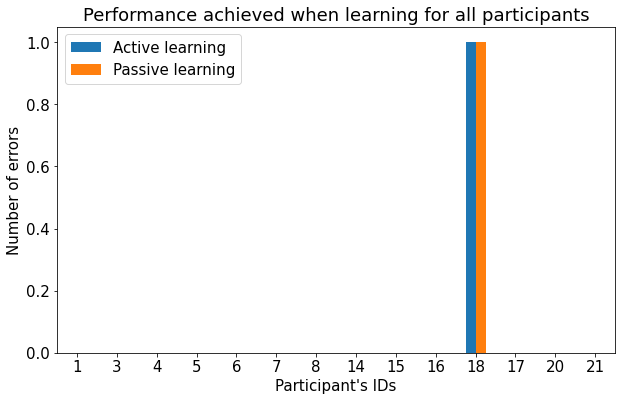

In [14]:
df_holder = df_zeroP.copy()
df_holder.rename(columns = {'active learn':'Active learning'}, inplace = True)
df_holder.rename(columns = {'passive learn':'Passive learning'}, inplace = True)
df_holder[["Active learning", "Passive learning"]].plot.bar()
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Performance achieved when learning for all participants")
plt.xlabel("Participant's IDs")
plt.ylabel("Number of errors")

### Attempts for all participants whose who reached the same accuracy

In [15]:
gen_stats(df_zeroP, "activeAttempts","passiveAttempts")
print(stats.wilcoxon(df_zeroP['activeAttempts'], 
                     df_zeroP['passiveAttempts'], 
                     zero_method='wilcox', 
                     correction=False, 
                     alternative='two-sided', 
                     mode='auto'))

--------MEAN ALL------------
mean of activeAttempts: 4.714
mean of passiveAttempts : 1.857
------------------------
--------std ALL------------
standard diviation of activeAttempts: 3.899
standard diviation of passiveAttempts: 0.99
------------------------
--------SE ALL------------
standard error of activeAttempts : 1.042
standard error of passiveAttempts: 0.265
------------------------
--------Normal distribution ALL------------
Gaussian: activeAttempts: [0.78  0.003]
Gaussian: passiveAttempts: [0.744 0.001]
------------------------
WilcoxonResult(statistic=7.0, pvalue=0.011768151635045392)


### Attempts for Novices whose who reached the same accuracy

In [26]:
# # gen_stats(df_noplay_zero, "activeAttempts","passiveAttempts")
print(stats.wilcoxon(df_noplay_zero['activeAttempts'], 
                     df_noplay_zero['passiveAttempts'], 
                     zero_method='wilcox', 
                     correction=False, 
                     alternative='two-sided', 
                     mode='auto'))
# print(stats.ttest_rel(df_noplay_zero['activeAttempts'], 
#                      df_noplay_zero['passiveAttempts']))

WilcoxonResult(statistic=0.0, pvalue=0.027707849358079864)


### Attempts for Previous Piano Students who reached the same accuracy

In [17]:
gen_stats(df_play_zero, "activeAttempts","passiveAttempts")
print(stats.wilcoxon(df_play_zero['activeAttempts'], 
                     df_play_zero['passiveAttempts'], 
                     zero_method='wilcox', 
                     correction=False, 
                     alternative='two-sided', 
                     mode='auto'))

--------MEAN ALL------------
mean of activeAttempts: 2.857
mean of passiveAttempts : 1.714
------------------------
--------std ALL------------
standard diviation of activeAttempts: 1.552
standard diviation of passiveAttempts: 1.03
------------------------
--------SE ALL------------
standard error of activeAttempts : 0.587
standard error of passiveAttempts: 0.389
------------------------
--------Normal distribution ALL------------
Gaussian: activeAttempts: [0.885 0.25 ]
Gaussian: passiveAttempts: [0.72  0.006]
------------------------
WilcoxonResult(statistic=5.0, pvalue=0.24625169969252703)


# Primacy/Recency

In [77]:
allP_memory =       [7,8,16,17,20,10,18,19,21,22,23]
df_allP_memory = generateDataFrame_memory(allP_memory)
df_allP_memory.index = translateToPaper(allP_memory)

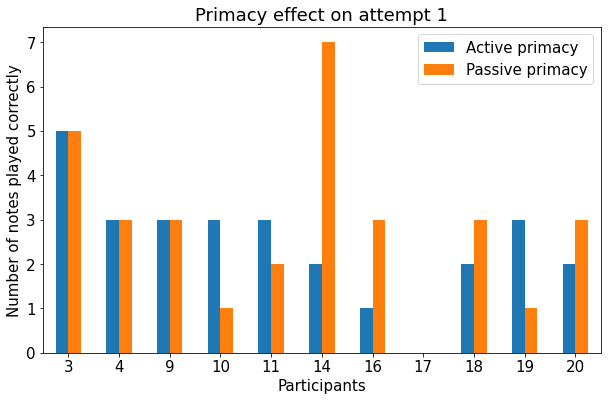

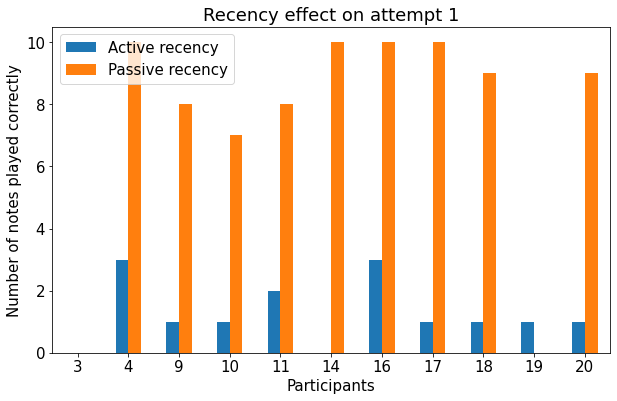

In [78]:
df_holder = df_allP_memory.copy()
df_holder.rename(columns = {'activePrimacy':'Active primacy'}, inplace = True)
df_holder.rename(columns = {'passivePrimacy':'Passive primacy'}, inplace = True)
df_holder[["Active primacy","Passive primacy"]].plot.bar()
plt.title("Primacy effect on attempt 1")
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Participants")
plt.ylabel("Number of notes played correctly")
plt.savefig("all_primacy_fixedRealIDs.png")

df_holder = df_allP_memory.copy()
df_holder.rename(columns = {'activeRecency':'Active recency'}, inplace = True)
df_holder.rename(columns = {'passiveRecency':'Passive recency'}, inplace = True)
df_holder[["Active recency","Passive recency"]].plot.bar()
plt.title("Recency effect on attempt 1")
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Participants")
plt.ylabel("Number of notes played correctly")
plt.savefig("all_recency_fixedRealIDs.png")

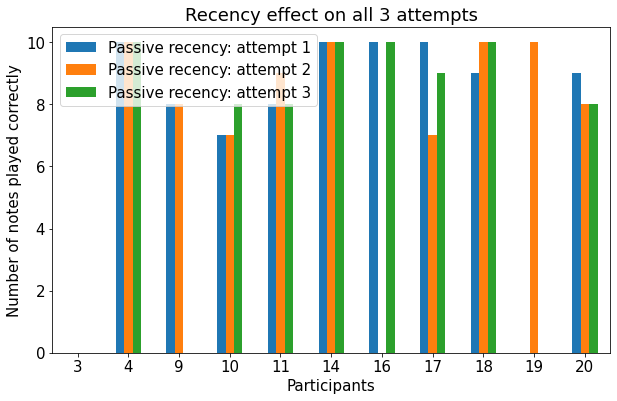

In [79]:
df_holder = df_allP_memory.copy()
df_holder.rename(columns = {'activeRecency':'Active recency: attempt 1'}, inplace = True)
df_holder.rename(columns = {'passiveRecency':'Passive recency: attempt 1'}, inplace = True)
df_holder.rename(columns = {'activeRecency2':'Active recency: attempt 2'}, inplace = True)
df_holder.rename(columns = {'passiveRecency2':'Passive recency: attempt 2'}, inplace = True)
df_holder.rename(columns = {'activeRecency3':'Active recency: attempt 3'}, inplace = True)
df_holder.rename(columns = {'passiveRecency3':'Passive recency: attempt 3'}, inplace = True)
df_holder[["Passive recency: attempt 1","Passive recency: attempt 2", "Passive recency: attempt 3"]].plot.bar()
plt.title("Recency effect on all 3 attempts")
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Participants")
plt.ylabel("Number of notes played correctly")
plt.savefig("all_recency_attempts_fixedRealIDs.png")

## Primacy attempt 1

In [80]:
gen_stats(df_allP_memory, "activePrimacy","passivePrimacy")
print(stats.ttest_rel(df_allP_memory["activePrimacy"], df_allP_memory['passivePrimacy']))

--------MEAN ALL------------
mean of activePrimacy: 2.455
mean of passivePrimacy : 2.818
------------------------
--------std ALL------------
standard diviation of activePrimacy: 1.233
standard diviation of passivePrimacy: 1.85
------------------------
--------SE ALL------------
standard error of activePrimacy : 0.372
standard error of passivePrimacy: 0.558
------------------------
--------Normal distribution ALL------------
Gaussian: activePrimacy: [0.91  0.246]
Gaussian: passivePrimacy: [0.907 0.222]
------------------------
Ttest_relResult(statistic=-0.6142951168339511, pvalue=0.5527388731075369)


## Primacy attempt 2

In [81]:
gen_stats(df_allP_memory, "activePrimacy2","passivePrimacy2")
print(stats.ttest_rel(df_allP_memory["activePrimacy2"], df_allP_memory['passivePrimacy2']))

--------MEAN ALL------------
mean of activePrimacy2: 2.818
mean of passivePrimacy2 : 4.0
------------------------
--------std ALL------------
standard diviation of activePrimacy2: 1.466
standard diviation of passivePrimacy2: 2.335
------------------------
--------SE ALL------------
standard error of activePrimacy2 : 0.442
standard error of passivePrimacy2: 0.704
------------------------
--------Normal distribution ALL------------
Gaussian: activePrimacy2: [0.888 0.13 ]
Gaussian: passivePrimacy2: [0.939 0.509]
------------------------
Ttest_relResult(statistic=-1.6326711677358168, pvalue=0.13358794715276326)


## Primacy attempt 3

In [82]:
gen_stats(df_allP_memory, "activePrimacy3","passivePrimacy3")
print(stats.ttest_rel(df_allP_memory["activePrimacy3"], df_allP_memory['passivePrimacy3']))

--------MEAN ALL------------
mean of activePrimacy3: 2.636
mean of passivePrimacy3 : 4.0
------------------------
--------std ALL------------
standard diviation of activePrimacy3: 1.872
standard diviation of passivePrimacy3: 2.132
------------------------
--------SE ALL------------
standard error of activePrimacy3 : 0.564
standard error of passivePrimacy3: 0.643
------------------------
--------Normal distribution ALL------------
Gaussian: activePrimacy3: [0.842 0.033]
Gaussian: passivePrimacy3: [0.913 0.262]
------------------------
Ttest_relResult(statistic=-1.656472891122698, pvalue=0.12862275601551046)


## Recency attempt 1

In [83]:
gen_stats(df_allP_memory, "activeRecency","passiveRecency")
print(stats.wilcoxon(df_allP_memory["activeRecency"], df_allP_memory['passiveRecency'], zero_method='wilcox', correction=False, alternative='two-sided', mode='auto'))

--------MEAN ALL------------
mean of activeRecency: 1.273
mean of passiveRecency : 7.364
------------------------
--------std ALL------------
standard diviation of activeRecency: 0.962
standard diviation of passiveRecency: 3.6
------------------------
--------SE ALL------------
standard error of activeRecency : 0.29
standard error of passiveRecency: 1.085
------------------------
--------Normal distribution ALL------------
Gaussian: activeRecency: [0.826 0.021]
Gaussian: passiveRecency: [0.694 0.   ]
------------------------
WilcoxonResult(statistic=1.0, pvalue=0.006693593411311255)


## Recency attempts 2

In [84]:
gen_stats(df_allP_memory, "activeRecency2","passiveRecency2")
print(stats.wilcoxon(df_allP_memory["activeRecency2"], df_allP_memory['passiveRecency2'], zero_method='wilcox', correction=False, alternative='two-sided', mode='auto'))

--------MEAN ALL------------
mean of activeRecency2: 0.727
mean of passiveRecency2 : 7.182
------------------------
--------std ALL------------
standard diviation of activeRecency2: 0.445
standard diviation of passiveRecency2: 3.563
------------------------
--------SE ALL------------
standard error of activeRecency2 : 0.134
standard error of passiveRecency2: 1.074
------------------------
--------Normal distribution ALL------------
Gaussian: activeRecency2: [0.572 0.   ]
Gaussian: passiveRecency2: [0.73  0.001]
------------------------
WilcoxonResult(statistic=1.0, pvalue=0.0066221306115235926)


## Recency attempts 3

In [85]:
gen_stats(df_allP_memory, "activeRecency3","passiveRecency3")
print(stats.wilcoxon(df_allP_memory["activeRecency3"], df_allP_memory['passiveRecency3'], zero_method='wilcox', correction=False, alternative='two-sided', mode='auto'))

--------MEAN ALL------------
mean of activeRecency3: 1.0
mean of passiveRecency3 : 6.636
------------------------
--------std ALL------------
standard diviation of activeRecency3: 0.739
standard diviation of passiveRecency3: 4.14
------------------------
--------SE ALL------------
standard error of activeRecency3 : 0.223
standard error of passiveRecency3: 1.248
------------------------
--------Normal distribution ALL------------
Gaussian: activeRecency3: [0.833 0.025]
Gaussian: passiveRecency3: [0.705 0.001]
------------------------
WilcoxonResult(statistic=3.0, pvalue=0.012230642140651594)


# RECALL MISTAKES

## Unaided Recall

### Unaided recall: all participants

In [86]:
gen_stats(df_allP, "errorsActiveFT","errorsPassiveFT")
stats.ttest_rel(df_allP['errorsActiveFT'], df_allP['errorsPassiveFT'])

--------MEAN ALL------------
mean of errorsActiveFT: 2.8
mean of errorsPassiveFT : 2.75
------------------------
--------std ALL------------
standard diviation of errorsActiveFT: 1.806
standard diviation of errorsPassiveFT: 1.946
------------------------
--------SE ALL------------
standard error of errorsActiveFT : 0.404
standard error of errorsPassiveFT: 0.435
------------------------
--------Normal distribution ALL------------
Gaussian: errorsActiveFT: [0.949 0.346]
Gaussian: errorsPassiveFT: [0.91  0.063]
------------------------


Ttest_relResult(statistic=0.10220224858178599, pvalue=0.9196670701479874)

### Unaided recall: previous piano students

In [87]:
gen_stats(df_play, "errorsActiveFT","errorsPassiveFT")
stats.ttest_rel(df_play['errorsActiveFT'], df_play['errorsPassiveFT'])

--------MEAN ALL------------
mean of errorsActiveFT: 2.7
mean of errorsPassiveFT : 2.5
------------------------
--------std ALL------------
standard diviation of errorsActiveFT: 1.552
standard diviation of errorsPassiveFT: 1.5
------------------------
--------SE ALL------------
standard error of errorsActiveFT : 0.491
standard error of errorsPassiveFT: 0.474
------------------------
--------Normal distribution ALL------------
Gaussian: errorsActiveFT: [0.934 0.487]
Gaussian: errorsPassiveFT: [0.827 0.031]
------------------------


Ttest_relResult(statistic=0.36115755925730764, pvalue=0.7263142108887259)

### Unaided recall: novices

In [88]:
gen_stats(df_noplay, "errorsActiveFT","errorsPassiveFT")
stats.ttest_rel(df_noplay['errorsActiveFT'], df_noplay['errorsPassiveFT'])

--------MEAN ALL------------
mean of errorsActiveFT: 2.9
mean of errorsPassiveFT : 3.0
------------------------
--------std ALL------------
standard diviation of errorsActiveFT: 2.022
standard diviation of errorsPassiveFT: 2.28
------------------------
--------SE ALL------------
standard error of errorsActiveFT : 0.64
standard error of errorsPassiveFT: 0.721
------------------------
--------Normal distribution ALL------------
Gaussian: errorsActiveFT: [0.958 0.767]
Gaussian: errorsPassiveFT: [0.923 0.38 ]
------------------------


Ttest_relResult(statistic=-0.11961783342433502, pvalue=0.9074134849532967)

## Aided Recall

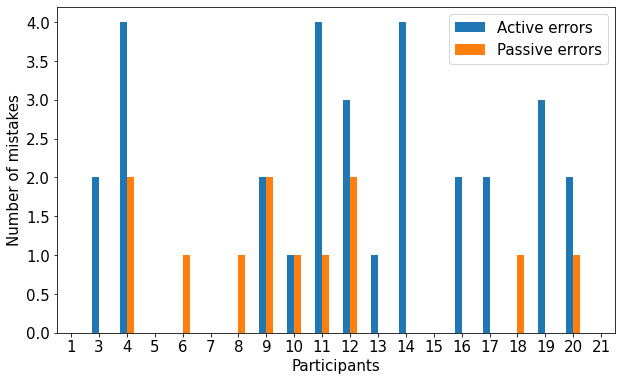

In [89]:
#Number of mistakes on the First Recall
# df_allP[["errorsActiveAT","errorsPassiveAT"]].plot.bar()
df_holder = df_allP.copy()
df_holder.rename(columns = {'errorsActiveAT':'Active errors'}, inplace = True)
df_holder.rename(columns = {'errorsPassiveAT':'Passive errors'}, inplace = True)
df_holder[["Active errors","Passive errors"]].plot.bar()
plt.xticks(rotation=0, horizontalalignment="center")
# plt.title("Number of Mistakes on the Aided Recall")
plt.xlabel("Participants")
plt.ylabel("Number of mistakes")
plt.savefig("all_mistakes_aided_fixedRealIDs.png")

### Aided recall: all participants

In [90]:
gen_stats(df_allP, "errorsActiveAT","errorsPassiveAT")
print(stats.wilcoxon(df_allP['errorsActiveAT'], 
                     df_allP['errorsPassiveAT'], 
                     zero_method='wilcox', 
                     correction=False, 
                     alternative='two-sided', 
                     mode='auto'))

--------MEAN ALL------------
mean of errorsActiveAT: 1.5
mean of errorsPassiveAT : 0.6
------------------------
--------std ALL------------
standard diviation of errorsActiveAT: 1.466
standard diviation of errorsPassiveAT: 0.735
------------------------
--------SE ALL------------
standard error of errorsActiveAT : 0.328
standard error of errorsPassiveAT: 0.164
------------------------
--------Normal distribution ALL------------
Gaussian: errorsActiveAT: [0.838 0.003]
Gaussian: errorsPassiveAT: [0.74 0.  ]
------------------------
WilcoxonResult(statistic=10.5, pvalue=0.013098342187735815)


### Aided recall: novices

In [91]:
gen_stats(df_noplay, "errorsActiveAT","errorsPassiveAT")
print(stats.wilcoxon(df_noplay['errorsActiveAT'], 
                     df_noplay['errorsPassiveAT'], 
                     zero_method='wilcox', 
                     correction=False, 
                     alternative='two-sided', 
                     mode='auto'))

--------MEAN ALL------------
mean of errorsActiveAT: 1.7
mean of errorsPassiveAT : 0.4
------------------------
--------std ALL------------
standard diviation of errorsActiveAT: 1.345
standard diviation of errorsPassiveAT: 0.663
------------------------
--------SE ALL------------
standard error of errorsActiveAT : 0.425
standard error of errorsPassiveAT: 0.21
------------------------
--------Normal distribution ALL------------
Gaussian: errorsActiveAT: [0.905 0.249]
Gaussian: errorsPassiveAT: [0.65 0.  ]
------------------------
WilcoxonResult(statistic=2.5, pvalue=0.02778578270530869)


### Aided recall: previous piano students

In [92]:
gen_stats(df_play, "errorsActiveAT","errorsPassiveAT")
print(stats.wilcoxon(df_play['errorsActiveAT'], 
                     df_play['errorsPassiveAT'], 
                     zero_method='wilcox', 
                     correction=False, 
                     alternative='two-sided', 
                     mode='auto'))

--------MEAN ALL------------
mean of errorsActiveAT: 1.3
mean of errorsPassiveAT : 0.8
------------------------
--------std ALL------------
standard diviation of errorsActiveAT: 1.552
standard diviation of errorsPassiveAT: 0.748
------------------------
--------SE ALL------------
standard error of errorsActiveAT : 0.491
standard error of errorsPassiveAT: 0.237
------------------------
--------Normal distribution ALL------------
Gaussian: errorsActiveAT: [0.776 0.007]
Gaussian: errorsPassiveAT: [0.82  0.025]
------------------------
WilcoxonResult(statistic=3.0, pvalue=0.22067136191984693)
